In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("data.csv")
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


In [3]:
full_data = df.drop("liked", axis=1)

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(full_data, df["liked"], test_size=.20)

In [5]:
dtreeaccs = []
for i in range(1,11):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(xtrain,ytrain)
    dtreeaccs.append(sum(cross_val_score(dt, xtrain, ytrain, cv=5))/5)
dk_star = np.argmax(dtreeaccs)
bestDValue = range(1,11)[dk_star]
print("best depth value:", bestDValue)

dtreeaccs = []
for i in range(1, full_data.shape[1]):
    dt = DecisionTreeClassifier(max_depth=bestDValue, max_features=i)
    dt.fit(xtrain,ytrain)
    dtreeaccs.append(sum(cross_val_score(dt, xtrain, ytrain, cv=5))/5)
df_star = np.argmax(dtreeaccs)
bestFValue = range(1,full_data.shape[1])[df_star]
print("best features value:", bestFValue)

best depth value: 5
best features value: 2


In [6]:
tuned_dtree = DecisionTreeClassifier(max_depth=bestDValue, max_features=bestFValue)
tuned_dtree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, max_features=2)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

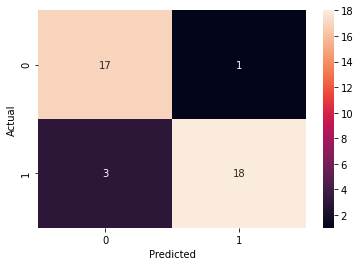

In [7]:
pred = tuned_dtree.predict(xtest)
## Build a nice Seaborn confusion matrix
data = {'y_Predicted': pred,
        'y_Actual':    ytest
        }

df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)

In [8]:
ylist = ytest.to_list()
dfA = len(ylist)
for y in range(0,len(ylist)):
    if pred[y] != ylist[y]:
        dfA -= 1
print("Decision tree accuracy: ", dfA/len(ylist) * 100, "%")

Decision tree accuracy:  89.74358974358975 %


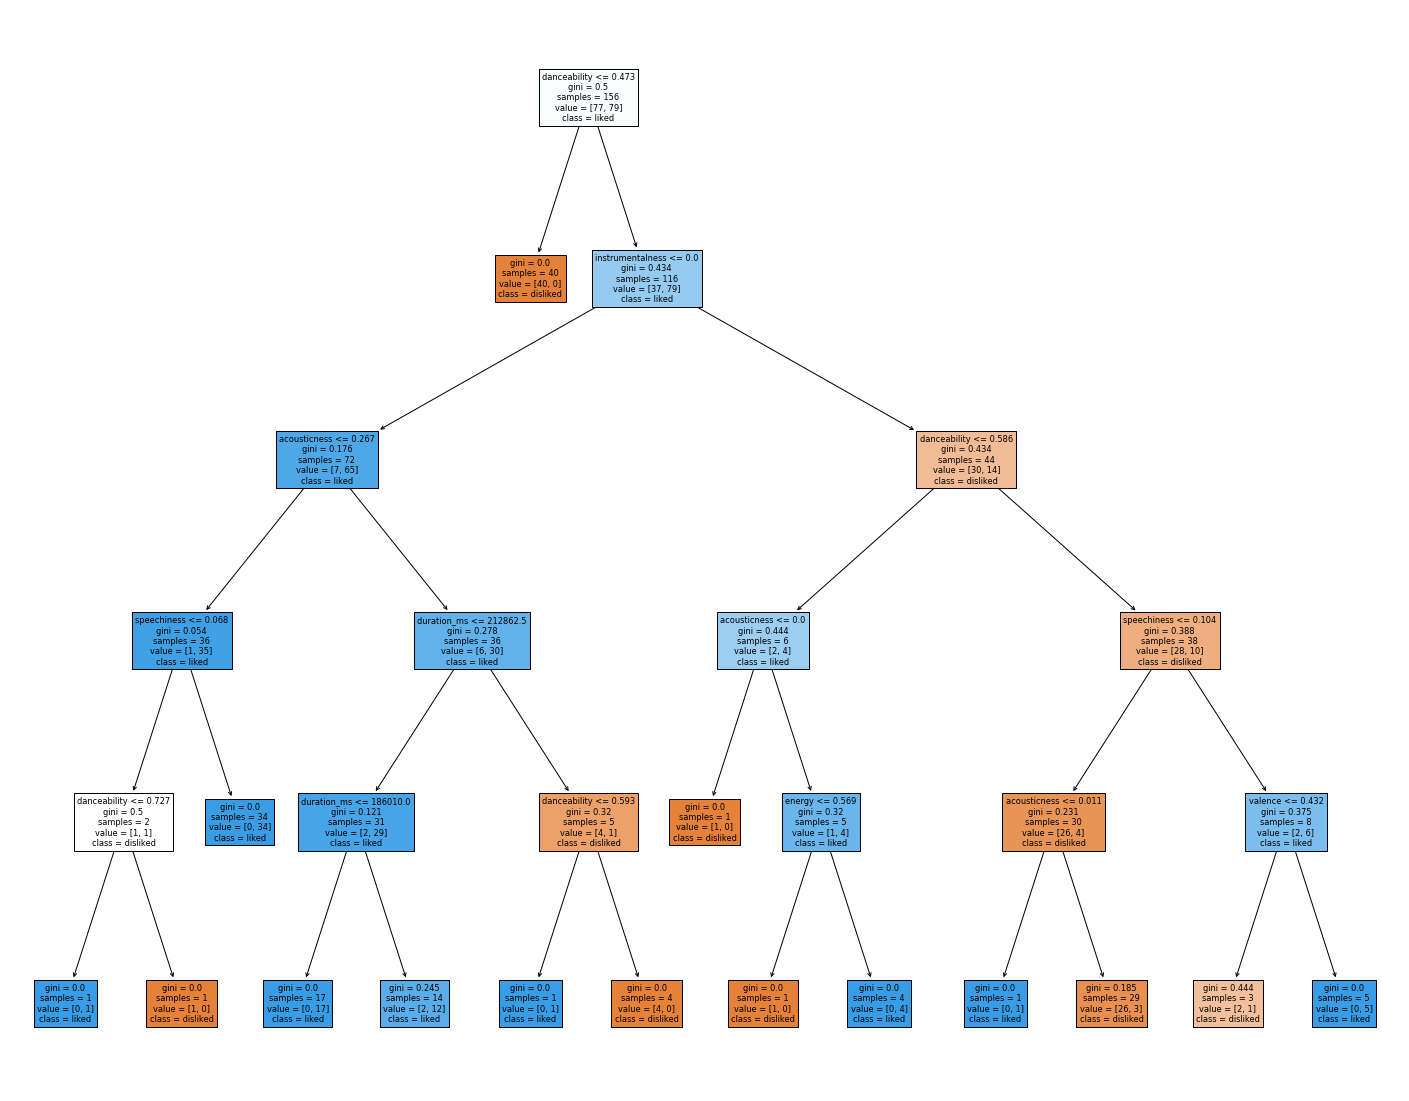

In [20]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
blah = tree.plot_tree(tuned_dtree, 
                feature_names=full_data.columns,
                      class_names=['disliked', 'liked'],
                   filled=True)
fig.savefig("decistion_tree.png")